In [20]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import seaborn as sns
%matplotlib inline

np.random.seed(1)

In [21]:
X,y=load_planar_dataset()

In [22]:
y=np.squeeze(y.T)

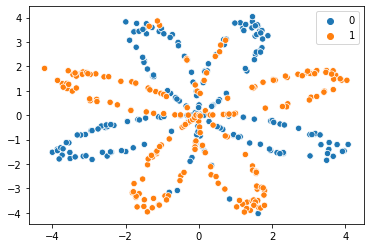

In [23]:
sns.scatterplot(x=X[0, :], y=X[1, :], hue=y, s=40, cmap=plt.cm.Spectral)

In [25]:
clf=sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,y.T)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [26]:
logreg_pred=clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y,logreg_pred) + np.dot(1-y,1-logreg_pred))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


In [27]:
def initialize_parameters(nx,nh,ny):
    np.random.seed(2)
    
    W1=np.random.randn(nh,nx)*0.01
    b1=np.zeros((nh,1))
    W2=np.random.randn(ny,nh)*0.01
    b2=np.zeros((ny,1))
    
    
    parameters={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    
    return parameters

In [3]:
def forward_prop(X,parameters):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    
    
    
    Z1=W1.dot(X)+b1
    A1=np.tanh(Z1)
    Z2=W2.dot(A1)+b2
    A2=sigmoid(Z2)
    
    cache={'Z1':Z1,'A1':A1,'Z2':Z2,'A2':A2}
    
    return A2,cache    

In [13]:
def compute_cost(A2,Y,parametrs):
    m=np.size(Y)
    
    
    logprobs=np.log(A2)*Y
    cost=-np.sum(logprobs)
    cost=float(np.squeeze(cost))
    
    return cost

In [5]:
def back_prop(parameters,cache,X,Y):
    m=np.size(Y)
    
    W1=parameters['W1']
    W2=parameters['W2']
    
    
    A1=cache['A1']
    A2=cache['A2']
    
    
    dZ2=A2-Y
    dW2=1/2*(dZ2.dot(A1.T))
    db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=(W2.T).dot(dZ2)*(1-np.power(A1,2))
    dW1=1/m*dZ1.dot(X.T)
    db1=1/m*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [6]:
def update_parameters(parameters,grads,alpha):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1-alpha*dW1
    b1 = b1-alpha*db1
    W2 = W2-alpha*dW2
    b2 = b2-alpha*db2
    
    parameters={'W1':W1,'b1':b1,'W2':W2,'b2':b2}

    return parameters

In [15]:
def nn_model(X,Y,nh,num,alpha):
    
    np.random.seed(3)
    
    nx=2
    ny=1
    
    
    parameters=initialize_parameters(nx,nh,ny)
    
    for i in range(num):
        A2,cache=forward_prop(X,parameters)
        cost=compute_cost(A2,Y,parameters)
        grads=back_prop(parameters,cache,X,Y)
        parameters=update_parameters(parameters,grads,alpha)
        if i%1000==0:
            print('Cost after iteration %i is %f'%(i,cost))
        
    cost=compute_cost(A2,Y,parameters)
    print('Final cost is %f'%cost)
    return parameters

In [16]:
def predict(parameters,X):
    A2,cache=forward_prop(X,parameters)
    predictions=(A2>0.5)
    
    return predictions

In [10]:
parameters=nn_model(X,y,4,5001,1.2)

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

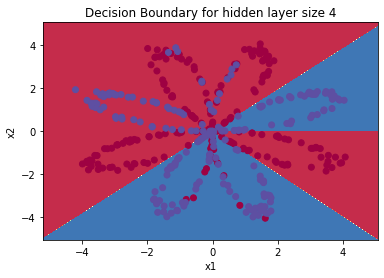

In [76]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [75]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) + '%')

Accuracy: 78%


Cost after iteration 0 is 138.629812
Cost after iteration 1000 is 9369.213633
Cost after iteration 2000 is 7943.450239
Cost after iteration 3000 is 8598.009688
Cost after iteration 4000 is 2422.452085
Cost after iteration 5000 is 2698.569847
Final cost is 2698.569847
Accuracy for 1 hidden units: 68.25 %
Cost after iteration 0 is 138.625228
Cost after iteration 1000 is 3238.878769
Cost after iteration 2000 is 3213.217528
Cost after iteration 3000 is 7127.894073
Cost after iteration 4000 is 1671.385509
Cost after iteration 5000 is 1765.975383
Final cost is 1765.975383
Accuracy for 2 hidden units: 67.75 %
Cost after iteration 0 is 138.625537
Cost after iteration 1000 is 3329.182835
Cost after iteration 2000 is 2016.824115
Cost after iteration 3000 is 3569.869116
Cost after iteration 4000 is 4263.152907
Cost after iteration 5000 is 3536.025559
Final cost is 3536.025559
Accuracy for 3 hidden units: 90.75 %
Cost after iteration 0 is 138.613963
Cost after iteration 1000 is 1504.765355
Cost af

C:\Users\Smriti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Smriti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 1000 is 175.297277
Cost after iteration 2000 is 1939.571311
Cost after iteration 3000 is 1760.831296
Cost after iteration 4000 is 1433.040161
Cost after iteration 5000 is 3373.883185
Final cost is 3373.883185
Accuracy for 20 hidden units: 91.25 %
Cost after iteration 0 is 138.643458
Cost after iteration 1000 is nan
Cost after iteration 2000 is nan
Cost after iteration 3000 is nan
Cost after iteration 4000 is nan
Cost after iteration 5000 is nan
Final cost is nan
Accuracy for 50 hidden units: 84.0 %


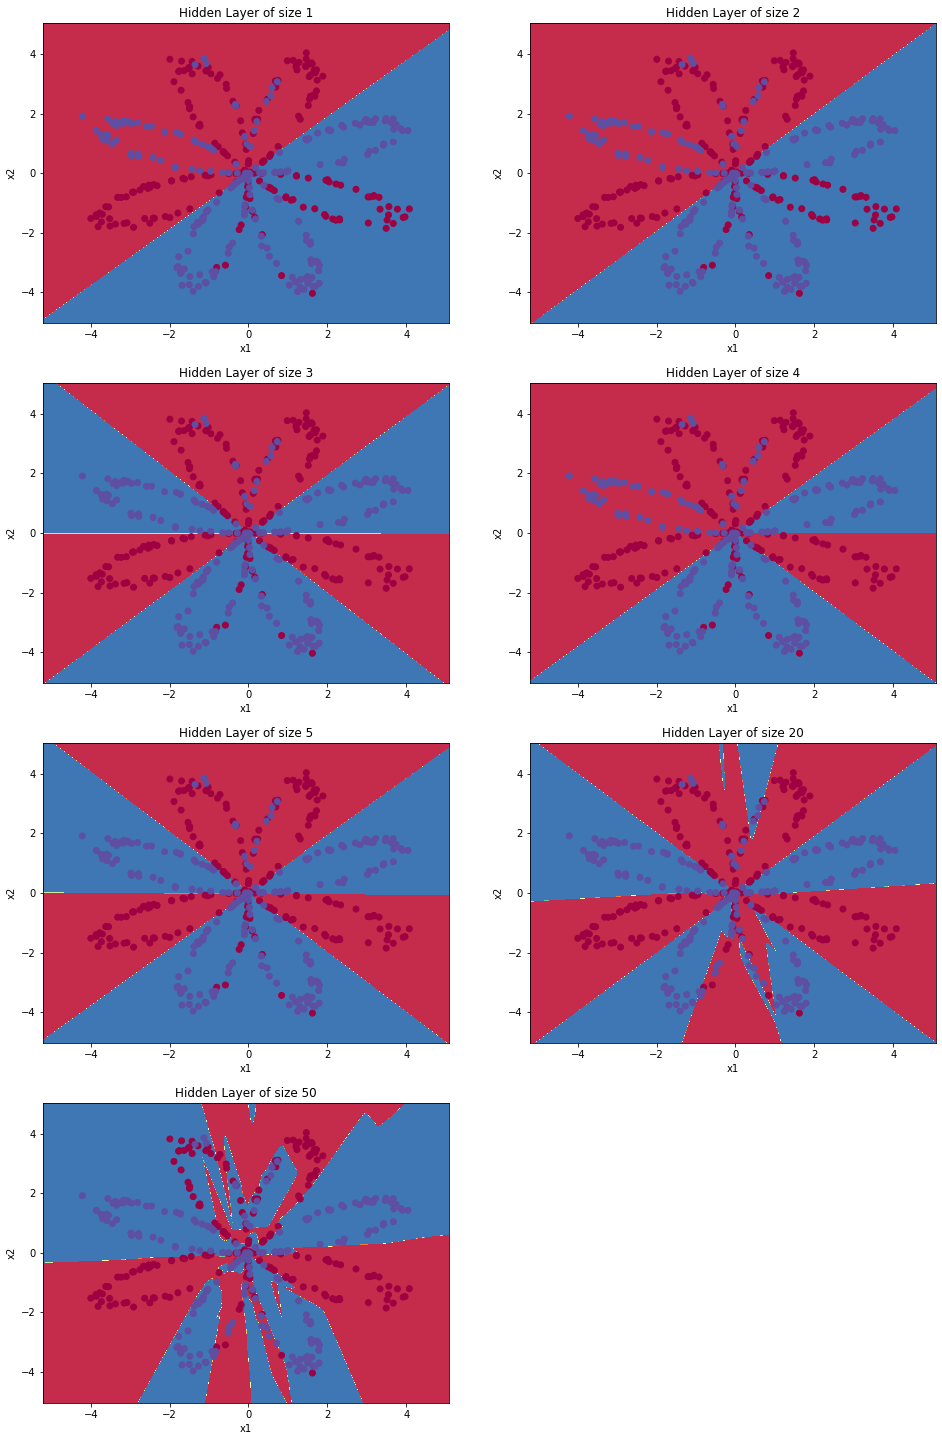

In [79]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, y, n_h, 5001,1.2)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

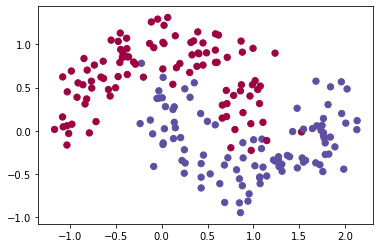

In [30]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])
Y=np.squeeze(Y.T)
# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [31]:
clf=sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [34]:
logreg_pred=clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,logreg_pred) + np.dot(1-Y,1-logreg_pred))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 87 % (percentage of correctly labelled datapoints)


In [17]:
parameters=nn_model(X,Y,5,5001,1.2)

Cost after iteration 0 is 69.348735
Cost after iteration 1000 is 404.302860
Cost after iteration 2000 is 0.016926
Cost after iteration 3000 is 121.432252
Cost after iteration 4000 is 20.675549
Cost after iteration 5000 is 8.498932
Final cost is 8.498932


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

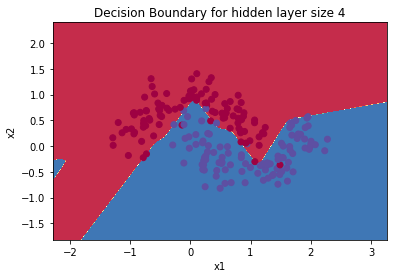

In [18]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [19]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 96%
